In [1]:
import numpy as np
import oct_tools as ot
import matplotlib.pyplot as plt

plt.style.use('dark_background')
# plt.rcParams['axes.facecolor'] = '#000000'
# plt.rcParams['figure.facecolor'] = '#000000'
# plt.rcParams['axes.text.color'] = '#111111'
# plt.plot([1234,123], )


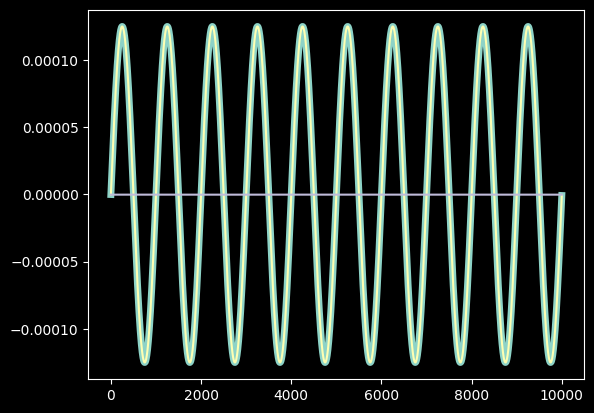

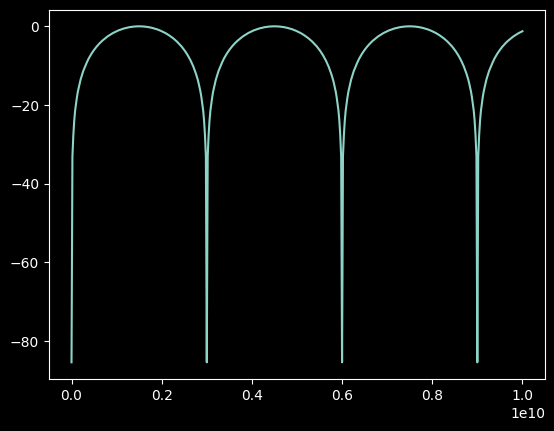

In [2]:

def sweep_frequency(start_freq, stop_freq, mzi):
    freq = np.linspace(start_freq, stop_freq, int(501))
    vpp = []
    for f in freq:
        t = np.arange(0, 10 / f, 1 / (f * 1000))
        wl = [ot.find_quadrature(mzi, 1050e-9)] * len(t)
        p = 10 + 1 * np.sin(2 * np.pi * f * t)
        t, p1, p2 = mzi.calculate_from_time(t, wl, p)
        vpp.append(max(p1 - p2) - min(p1 - p2))

        if f == freq[0]:
            plt.plot(p1 - np.mean(p1), linewidth=5)
            plt.plot(p2 - np.mean(p2))
            plt.plot(p1 - p2)
    plt.show()
    return freq, vpp

mzi = ot.Mzi(delta_l=100e-3)
freq, vpp = sweep_frequency(1, 10e9, mzi)
plt.plot(freq, 20 * np.log10(ot.normalize(vpp)))
# plt.plot(t, p1 - np.mean(p1))
# plt.plot(t, p2 - np.mean(p2))
# plt.plot(t, p1 - p2)
